In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples = 1000, n_features = 20, 
                           n_informative = 10, n_redundant = 10, 
                           random_state = 42
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
model = LogisticRegression(C = 0.01)
model.fit(X_train, y_train)
preds_test = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, preds_test))

Accuracy 0.87


In [6]:
np.linalg.norm(model.coef_)

0.6842820532275954

In [7]:
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

wn_list = []
acc_list = []

for C in C_list:
    model = LogisticRegression(C = C)
    model.fit(X_train, y_train)
    wn = np.linalg.norm(model.coef_)
    preds_test = model.predict(X_test)
    acc = accuracy_score(y_test, preds_test)
    
    wn_list.append(wn)
    acc_list.append(acc)

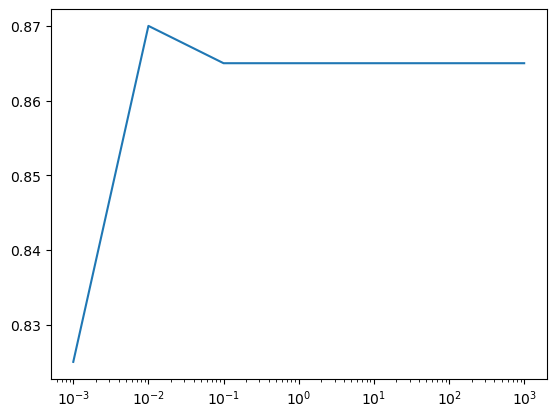

In [8]:
plt.semilogx(C_list, acc_list)

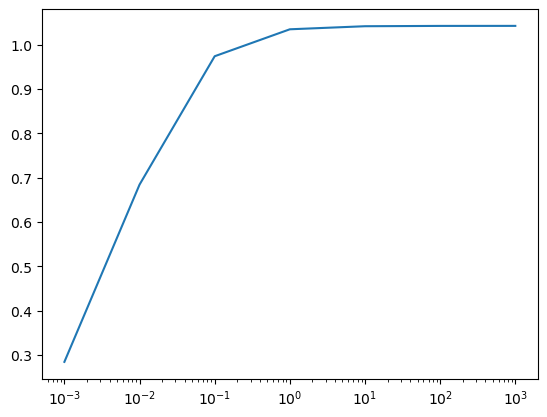

In [9]:
plt.semilogx(C_list, wn_list)

In [10]:
from sklearn.svm import SVC

model = SVC(C = 0.01, kernel = 'linear') # kernel choices: linear, poly, rbf
model.fit(X_train, y_train)
pres_test = model.predict(X_test)
print('Accuracy', accuracy_score(y_test, preds_test))

Accuracy 0.865


## Comparison between feature expansion and using kernel in svl

In [11]:
from sklearn.datasets import make_circles

In [12]:
X, y = make_circles(n_samples = 100, factor = 0.5, noise = 0.1, random_state = 42)

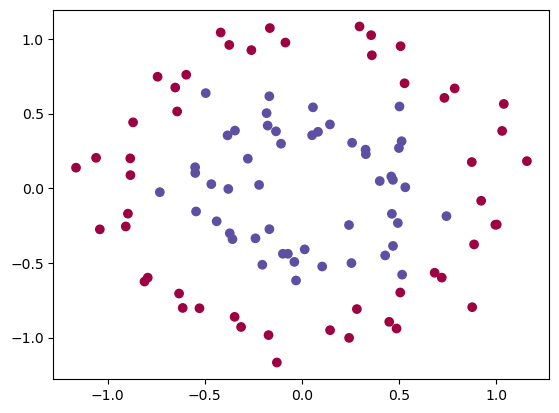

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [14]:
x0_min = X[:, 0].min() - 1
x0_max = X[:, 0].min() + 1

x1_min = X[:, 1].min() - 1
x1_max = X[:, 1].min() + 1

xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02), np.arange(x1_min, x1_max, 0.02))

In [15]:
xx0.shape, xx1.shape

((100, 100), (100, 100))

In [16]:
grid = np.concatenate((xx0.reshape(-1, 1), xx1.reshape(-1, 1)), axis = 1)

In [17]:
grid.shape

(10000, 2)

In [18]:
linear_svm = SVC(C = 1, kernel = 'linear')
linear_svm.fit(X, y)

pred_grid = linear_svm.predict(grid)

In [19]:
yy = pred_grid.reshape(xx0.shape)

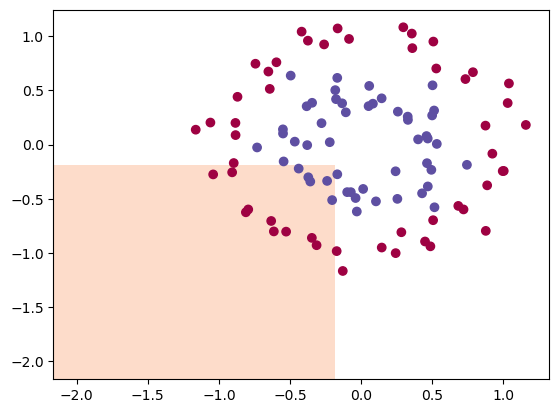

In [20]:
plt.contourf(xx0, xx1, yy, cmap=plt.cm.Spectral, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

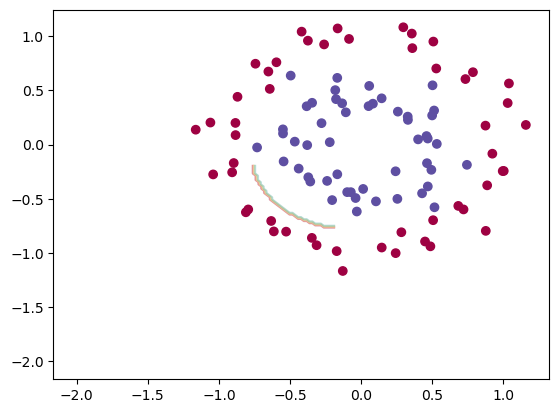

In [23]:
linear_svm_poly = SVC(C = 1, kernel = 'poly')
linear_svm_poly.fit(X_poly, y)
grid_poly = poly.transform(grid)
pred_grid = linear_svm_poly.predict(grid_poly)

yy = pred_grid.reshape(xx0.shape)

plt.contour(xx0, xx1, yy, cmap=plt.cm.Spectral, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)

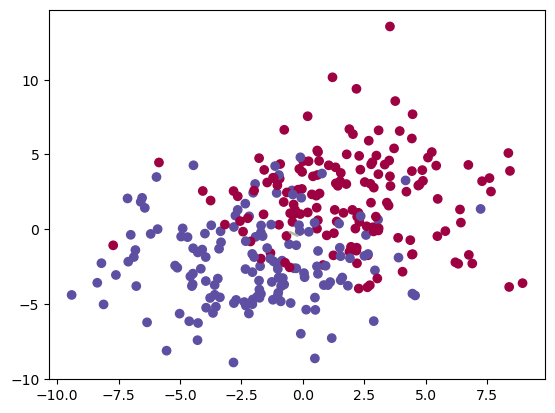

In [30]:
poly_svm = SVC(C = 1, kernel = 'poly', degree = 2, coef0 = 1)
poly_svm.fit(X, y)

pred_grid = poly_svm.predict(grid)

yy = pred_grid.reshape(xx0.shape)

plt.contour(xx0, xx1, yy, cmap=plt.cm.Spectral, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)

## Polynomial vs RBF kernel

In [25]:
from sklearn.datasets import make_blobs

In [26]:
X, y = make_blobs(n_samples = 300, centers = [[2,2], [-2, -2]], cluster_std = 3, random_state = 42)

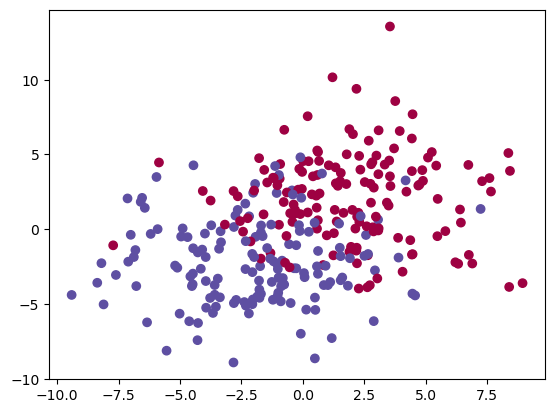

In [27]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Spectral)

In [33]:
x0_min = X[:, 0].min() - 1
x0_max = X[:, 0].min() + 1

x1_min = X[:, 1].min() - 1
x1_max = X[:, 1].min() + 1

xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.02), np.arange(x1_min, x1_max, 0.02))

grid = np.concatenate((xx0.reshape(-1, 1), xx1.reshape(-1, 1)), axis = 1)